In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import xarray as xr
import os
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm
import netCDF4
from netCDF4 import Dataset

<h1>Goal for the day: <br/>Use loops and if statements to manipulate an 10-minutely data set to give hourly outputs!

### something about people who know everything

<h2> 1. Intro to 'if' statements

In [ ]:
#Example of using 'if' statements
a=33
b=33

if b==a:
    print('b equals a')

<font color='blue'>Edit the following code to make it print 'a is greater than b'

In [ ]:
a=55
b=33

if a>b:
    print('a is greater than b')

<font color='blue'> List all the things you notice must be included in the if statement structure

1. if followed by a requirement (logic statement)
2. after the logic statement include a ':'
3. the next line(s) are indented. These lines say what to do if the statement is true

There are a whole bunch of logic statements we can use to write an if statement
* equals a == b
* not equals a != b
* less than a < b
* less than or equal to a <= b
* same two above for gerater than

<font color='blue'> Spend 3 minutes writing your own unique if statement using at least two of the following variables

In [ ]:
a=29
b=90
c=29


#many options!
if b>a:
 print(a+b)


<h2> 2. Intro to for loops 

In [ ]:
import numpy as np

#Make a numpy array of values
a=np.array([1,3,5,7,9,11,13,15,17,19,21,23])

for i in a:
    print('the value in this spot is '+str(i))

When we work with data, we often want to loop through each index of an array as opposed to each value of an array. 
<br><br>Instead of writing:
<code> for i in a: </code>
<br> Where the i values are: 1,3,5,7,9,11,13,15,17,19,21,23
<br>
<br>We write:
<code> for i in range(len(a)): </code>
<br> Then the i values are: 0,1,2,3,4,5,6,7,8,9,10,11 

In [ ]:
#Make a numpy array of values
a=np.array([1,3,5,7,9,11,13,15,17,19,21,23])

for i in range(len(a)):
    print('The value at index '+str(i)+' is '+str(a[i]))

<h2><font color=blue> Try to tackle the next two challenges
    <br/> (Spend 5 minutes in breakout rooms)/
    

<font color='blue'> Using the code above, write a for loop that prints out the value multiplied by 2 for each value in the array

In [ ]:
for i in a:
    print(i*2)

<font color='red'> Write code that will print out the value in the array only if (*hint*) that value multiplied by 2 is 30. 

In [ ]:
for i in a:
    if (i*2==30):
        print(i)

<h2> 3. Let's look at some real data!


![image.png](attachment:0ea21971-2e67-4623-a2e0-31653a299186.png)

In [ ]:
#Uploading data-don't need to worry about how to write any of this code yet!
lidar_winds=pd.read_csv('lidar_winds_short.csv')
time=np.asarray(lidar_winds['timestamp'])
wind18m=np.asarray(lidar_winds['wspd18m'])
wind_array=np.array([time,wind18m])

The lidar data we will use here is called wind_array! It is a numpy array with two columns: time and wind speed. Let's investigate what this data looks like!

In [ ]:
wind_array.shape

(2, 84396)

<font color ='blue'> What does this tell us about our array?

It has 2 columns and 84396 rows.

In [ ]:
wind_array[:,0:3]

array([['08-12-2019 00:00', '08-12-2019 00:10', '08-12-2019 00:20'],
       [7.2923, 7.8613, 7.7594]], dtype=object)

<font color ='blue'> What does this tell us about our array?

The first three rows consiste of a date with a time as the first column and a wind speed as a second column
The timesteps occur every 10 minutes

In [ ]:
print(wind_array[0,0])
print(wind_array[0,-1])

08-12-2019 00:00
03-21-2021 23:50


<font color ='blue'> What does this tell us about our array?

The data goes from 8/12/2019 to 3/21/2021

In [ ]:
print(np.amin(wind_array[1]))
print(np.amax(wind_array[1]))

0.5279
18.8254


<font color ='blue'> What does this tell us about our array?

The smallest and largest wind values

<h2> We want to look at the hourly data only from June 2020 

<h2><font color=blue> In the following code, after every # symbol, explain in your own words what the next line(s) of code are doing


In [ ]:

#Save the number of rows in wind_array as a variable Num_dates
Num_dates=len(wind_array[0])

#Initialize an empty numpy array
wind_06_2020=np.array([0,0])

#for a range of values from zero to the number of values in the wind_array
for i in range(len(wind_array[0])):
    #record the time and windspeed at each step
    time=wind_array[0,i]
    wdsp=wind_array[1,i]
    
    #From the time, record the year and month at each step
    year=time[6:10]
    month=time[0:2]
    
    #If the year is 2020 and the month is June
    if year=='2020' and month=='06':
        #Make a 2 entry array with that time and windspeed
        newdata=[time,wdsp]
        #Add that time,windspeed entry to the initalized numpy array
        wind_06_2020=np.vstack((wind_06_2020,newdata))

#After all the entries from June 2020 have been added, delete the initial [0,0] entry        
wind_06_2020=np.delete(wind_06_2020,0,0)
        

    
#Initialize a new 2d numpy array with one row of [0,0]
hourly_wind_06_2020=np.array([0,0])

    
#For a range of zero to number of hourly timesteps in june 2020 (number of 10 minutely timesteps/6)
for j in range(int(len(wind_06_2020[:,0])/6)):
    #label k as j*6, so k counts through all of the june 2020 timesteps by hour
    k=j*6
    #Make a new variable day_hour that just records the day and hour for each k element of wind_06_2020
    day_hour=wind_06_2020[k,0][3:5]+','+wind_06_2020[k,0][11:13]
    
    #hourly windspeed is calculated from the the k, k+1, k+2,...,k+5 timesteps of the 10 minute data. So each of the 10 minute data
    #is averaged hourly
    hourly_wdsp=np.mean([wind_array[1,k],wind_array[1,k+1],wind_array[1,k+2],wind_array[1,k+3],wind_array[1,k+4],wind_array[1,k+5]])

    #New hourly data takes the day_hour and hourly windspeed variables in a 2 column row
    newhourlydata=[day_hour,hourly_wdsp]
    
    #Add this new data to the initialized hourly windspeed array
    hourly_wind_06_2020=np.vstack((hourly_wind_06_2020,newhourlydata))
#After all hourly data has been added, delete the initial [0,0] row
hourly_wind_06_2020=np.delete(hourly_wind_06_2020,0,0)    
    
    

<h2><font color=blue> Run this loop to get the resulting data hourly_wind_array_2020. <br /> Explain in words what the resulting hourly_wind_array_2020 is. 

hourly_wind_06_2020 is a numpy array with two columns: time represented as day in june, hour in that day and rows representing each hourly mean 18m windspeed in june 2020. 

<font color=red> Copy and paste the code above edit this loop to make it more efficient or use fewer lines

In [ ]:
#results will vary! Compare the resulting array from the first code with your code to see if you did it right!

<h2> 4. More plotting using Matplotlib!

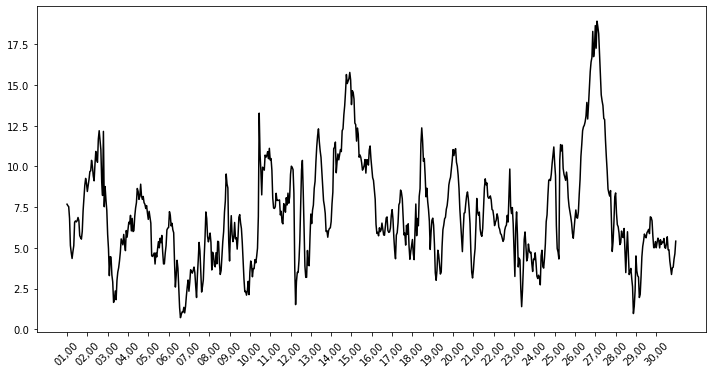

In [ ]:
#Create the figure
fig=plt.figure(figsize=(12,6))
#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#name and plot time on the x axis, wind on the y
time=hourly_wind_06_2020[:,0]
wind=hourly_wind_06_2020[:,1].astype('float64')

plt.plot(time, wind,color='black')

#Only label every 24 ticks (daily), otherwise it gets too crowded
ax.set_xticks(ax.get_xticks()[::24])
#rotate tick labels for better spacing/viewing
ax.tick_params(axis='x', rotation=45)


plt.show()

<font color='blue'> <h2> The code for the above image is copy and pasted below. 

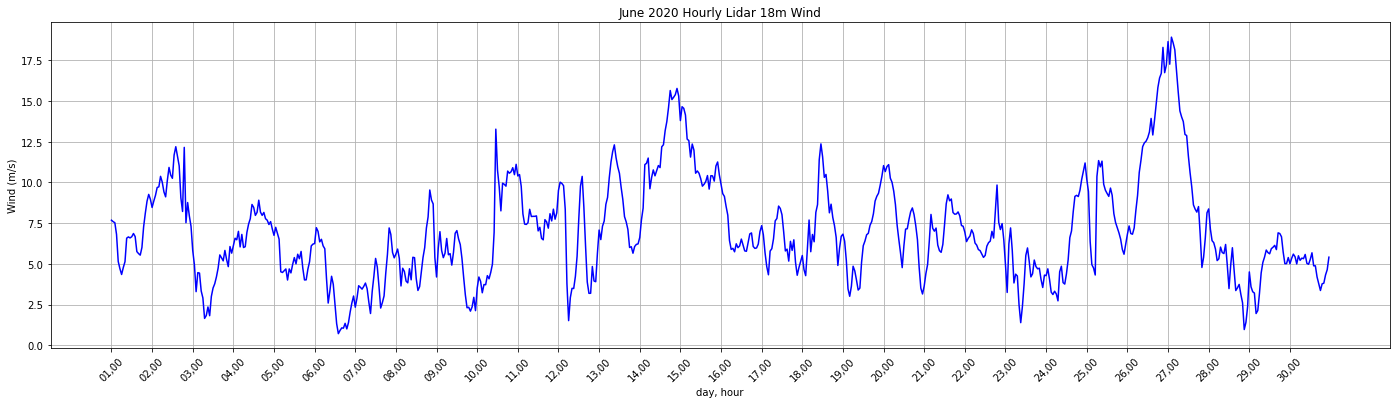

In [ ]:
#Create the figure
fig=plt.figure(figsize=(24,6))
#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#name and plot time on the x axis, wind on the y
time=hourly_wind_06_2020[:,0]
wind=hourly_wind_06_2020[:,1].astype('float64')

plt.plot(time, wind,color='blue')

#Only label every 24 ticks (daily), otherwise it gets too crowded
ax.set_xticks(ax.get_xticks()[::24])
#rotate tick labels for better spacing/viewing
ax.tick_params(axis='x', rotation=45)

plt.grid()

ax.set_title('June 2020 Hourly Lidar 18m Wind')
ax.set_xlabel('day, hour')
ax.set_ylabel('Wind (m/s)')
plt.show()

<font color='blue'> <h2> Edit/add to the code above so that the output matches the image below it.

![image.png](attachment:7bb0b4b8-8123-42cf-9b75-0249f5834dbb.png)